In [1]:
from Functions import *
from Optimizations import *
from Saving import *

import numpy as np

In [67]:
def create_animation_density_pictures(paths):
    """
    Assume all paths have same length"""
    if not os.path.isdir("./tmp"):
        os.mkdir("./tmp")
    ani_path = "./tmp/density_{}".format(time.time())
    os.mkdir(ani_path)

    for i in range(len(paths[0])):
        fig, ax = plt.subplots()
        ax.set_xlim(-25, 25)
        ax.set_ylim(-25, 25)
        ax.plot(paths[:, i, 0, :], paths[:, i, 1, :], "o")

        plt.savefig(ani_path + "/{}.png".format(i))
    return ani_path

In [2]:
%load_ext autoreload
%autoreload 1

In [80]:
def gamma(t):
    return 0.5/((t // 30) + 1)

def temperature(t):
    return 0.7/((t // 50) + 1)

In [81]:
# A = np.array([[1, 0], [0, 1]])
# b = 0
# f = QuadraticFunctionInit(A, b)
# f_grad = GradQuadraticFunctionInit(A)

f = AckleyProblem
f_grad = GradAckleyProblem


In [82]:
paths = []
for i in range(1000):
    x_start = np.array([[10 * np.random.uniform(-1, 1)], [10 * np.random.uniform(-1, 1)]])
    path = simulated_annealing_janky(f, f_grad, x_start, 1e-7, gamma, temperature, start_t=0 , end_t=250)
    paths.append(path)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


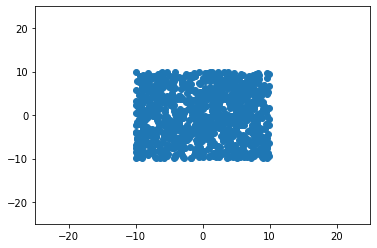

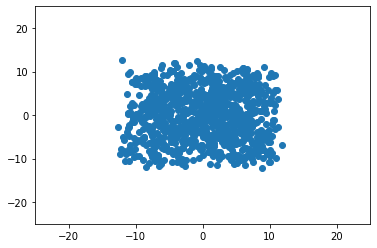

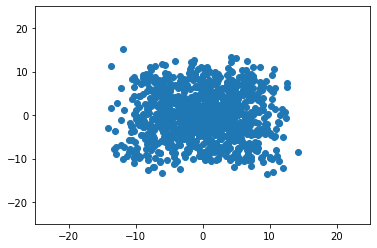

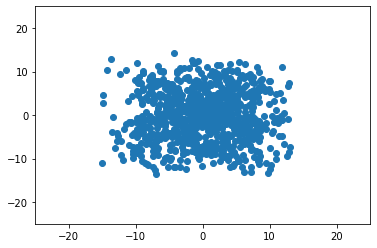

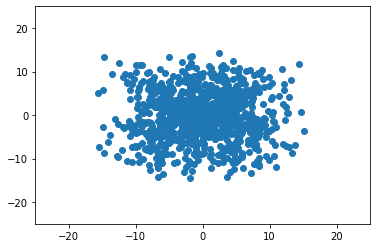

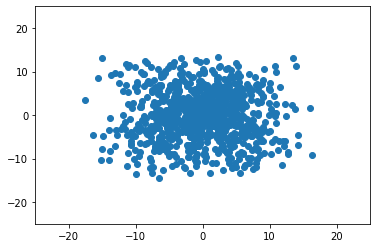

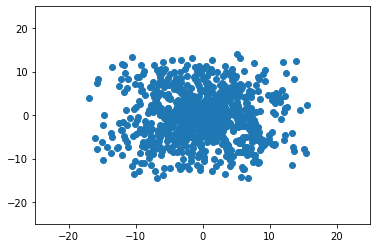

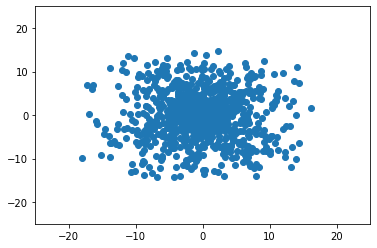

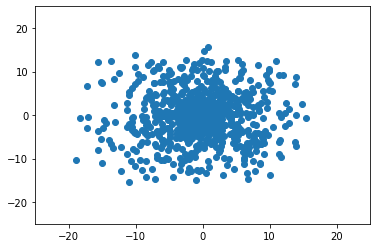

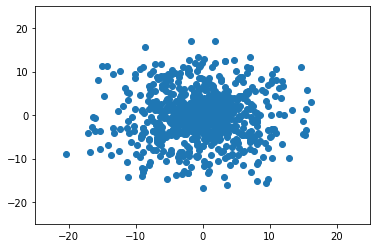

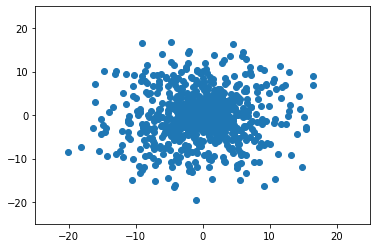

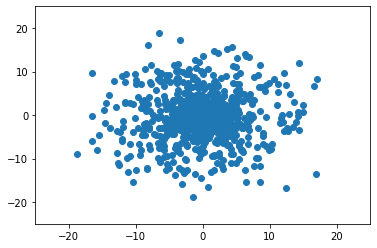

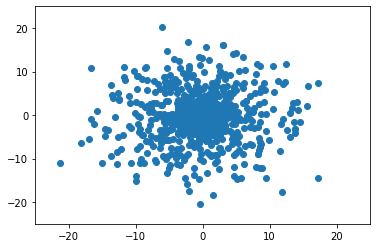

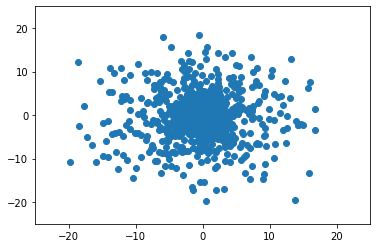

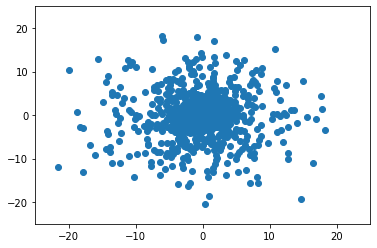

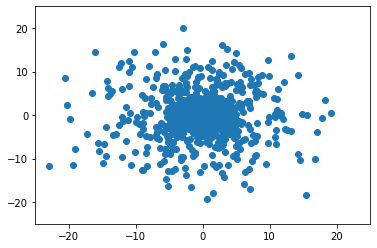

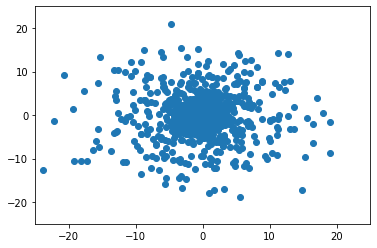

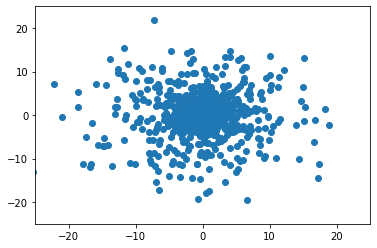

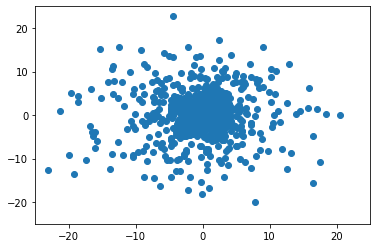

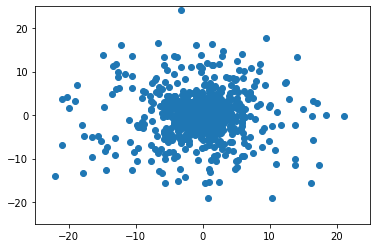

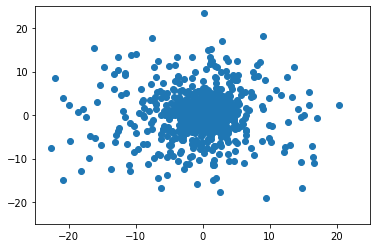

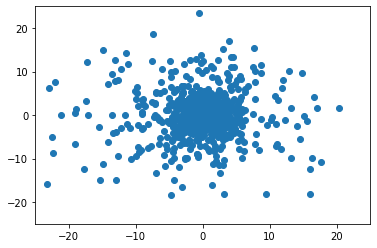

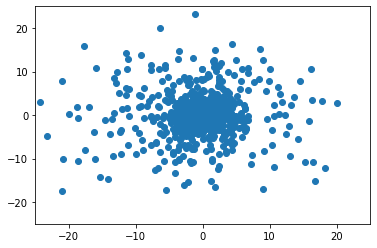

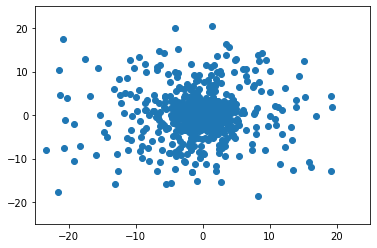

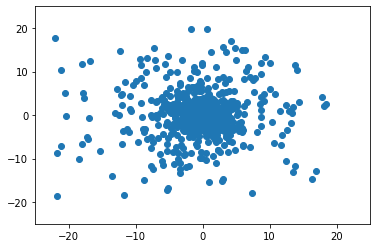

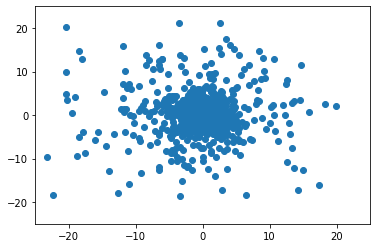

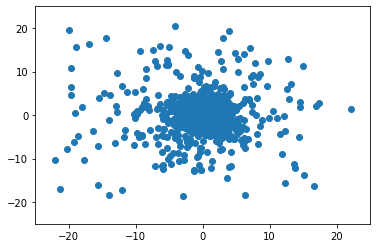

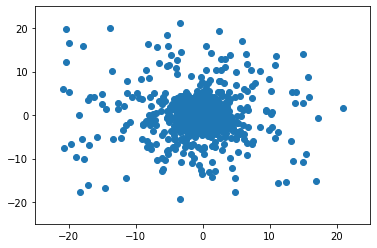

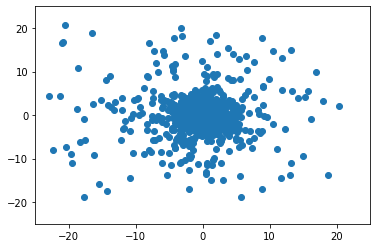

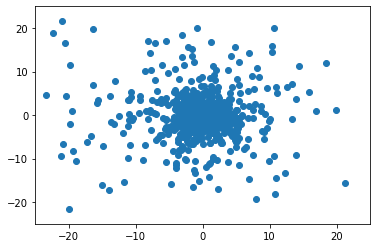

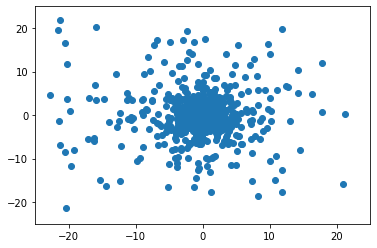

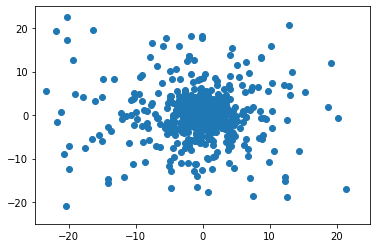

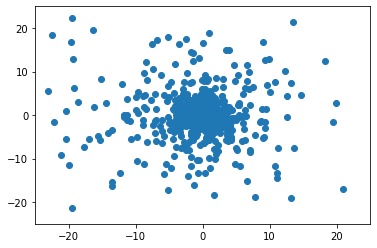

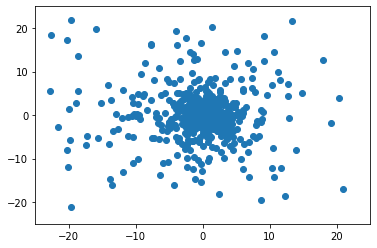

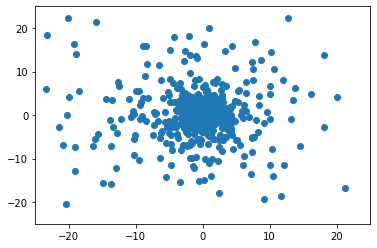

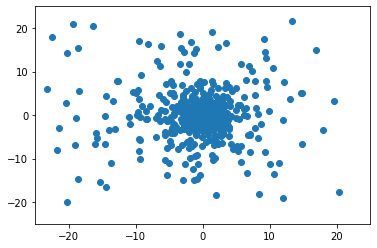

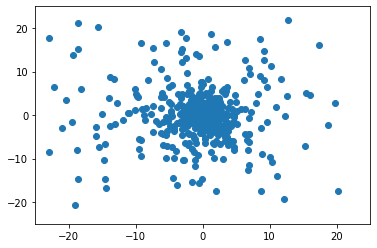

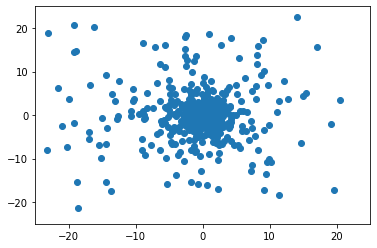

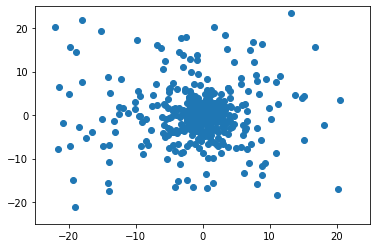

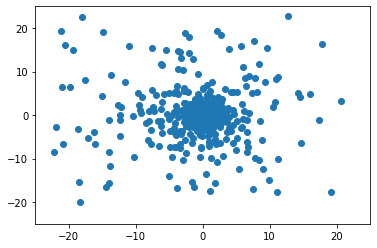

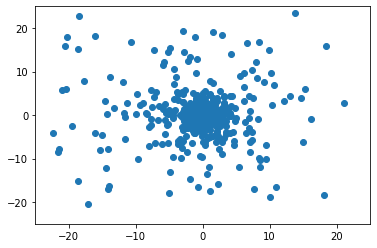

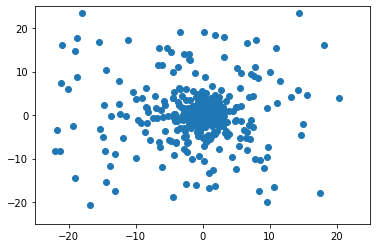

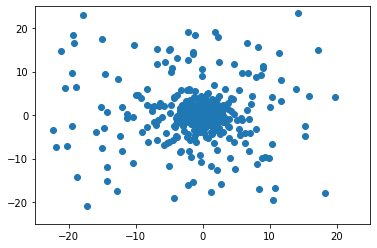

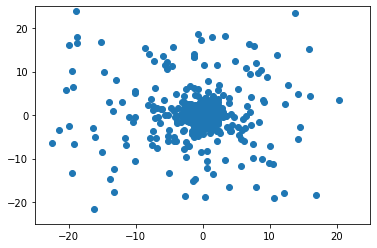

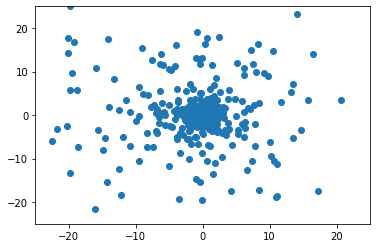

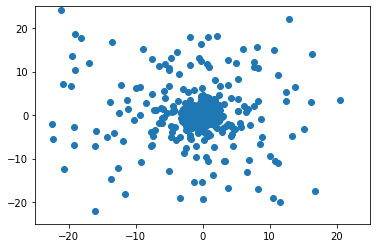

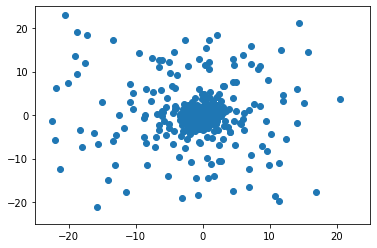

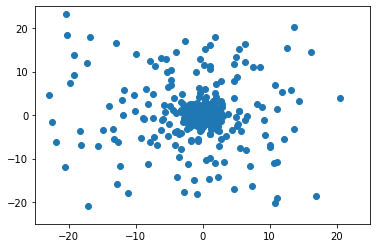

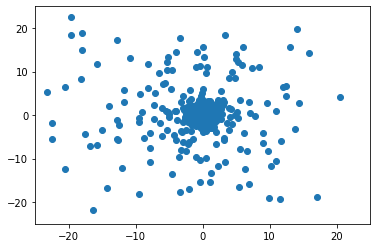

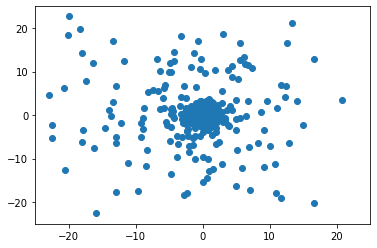

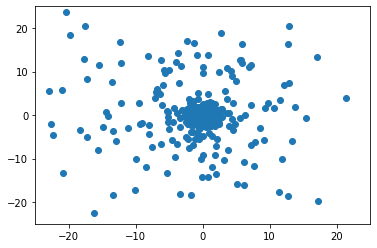

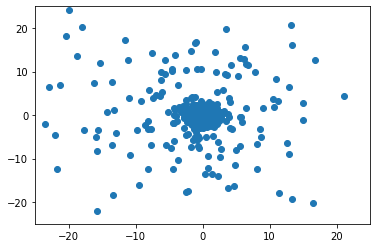

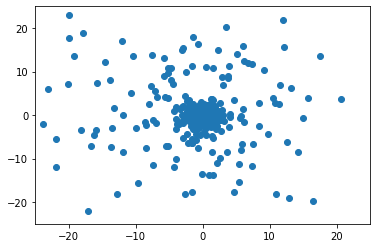

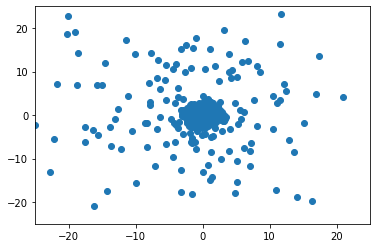

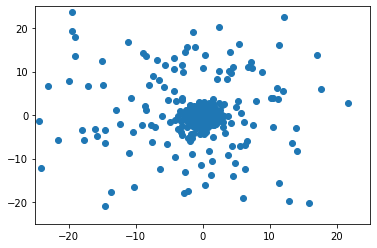

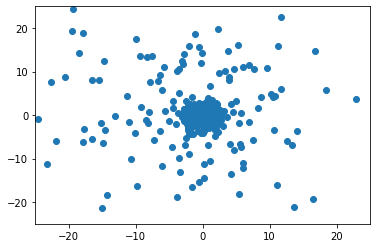

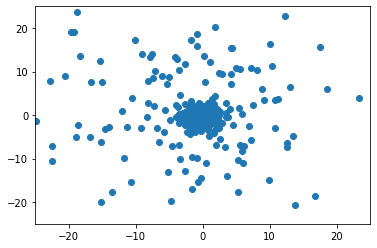

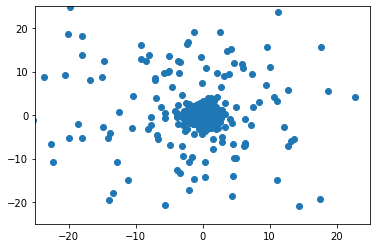

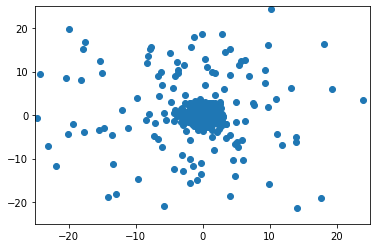

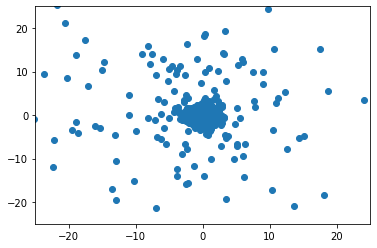

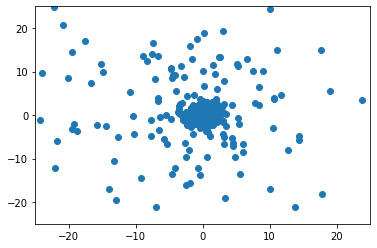

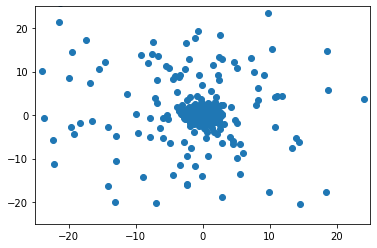

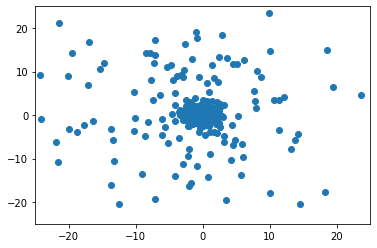

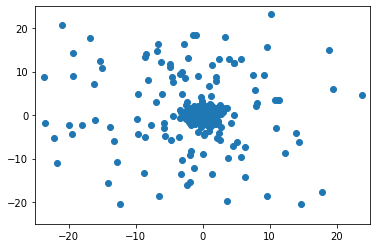

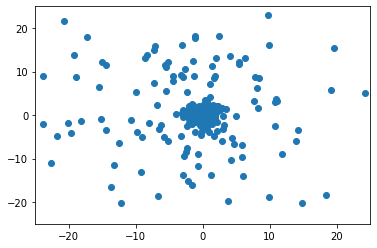

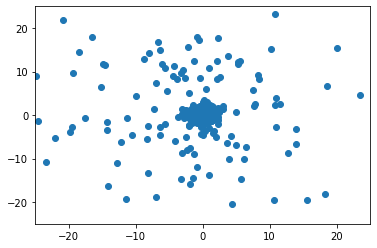

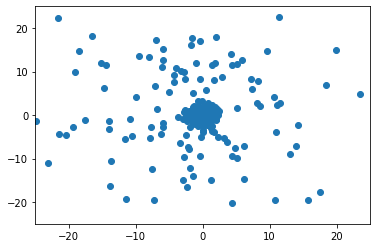

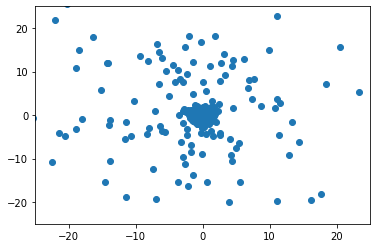

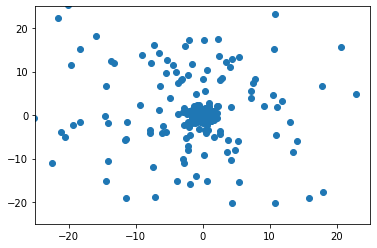

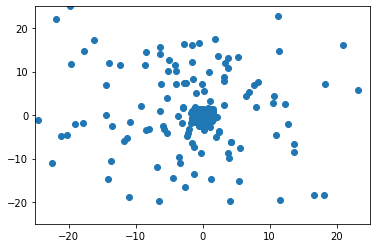

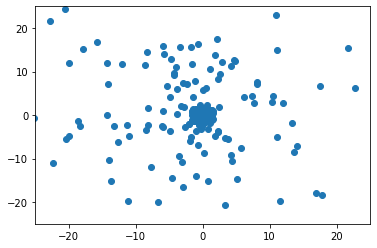

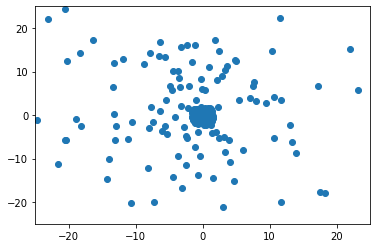

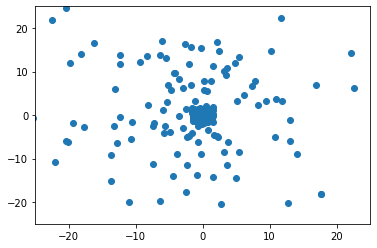

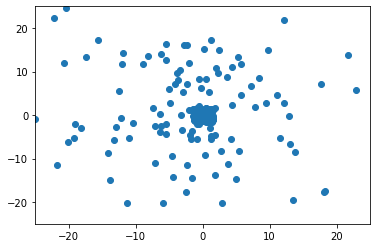

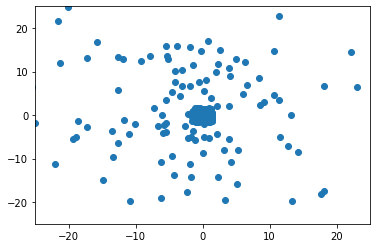

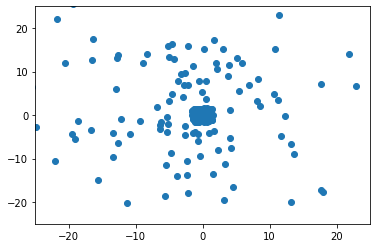

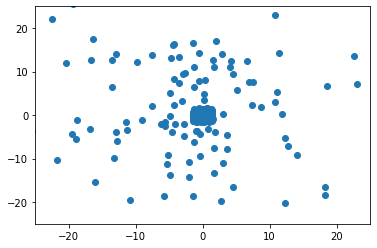

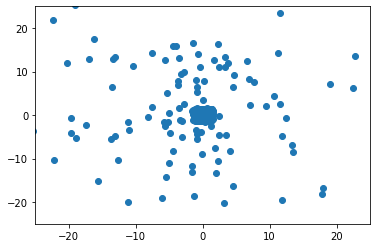

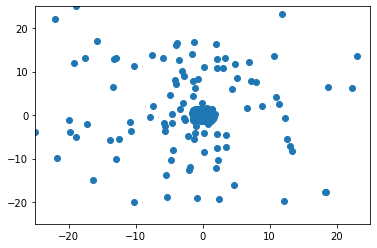

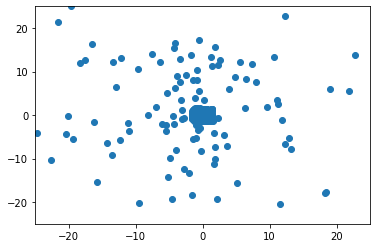

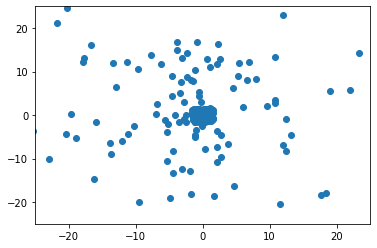

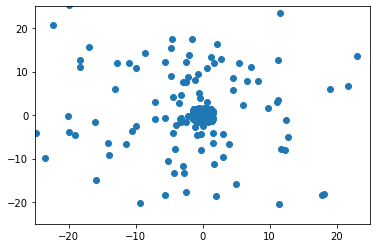

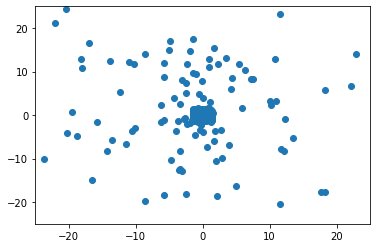

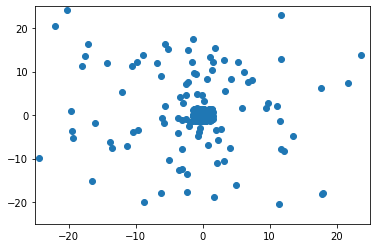

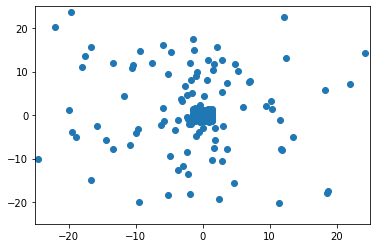

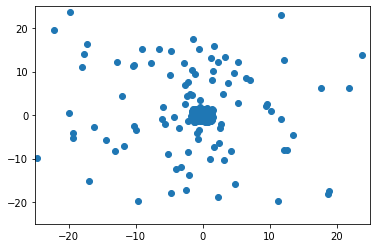

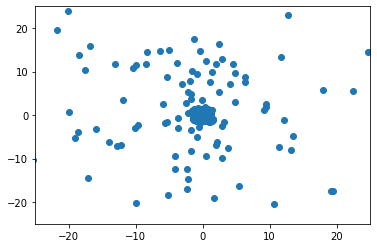

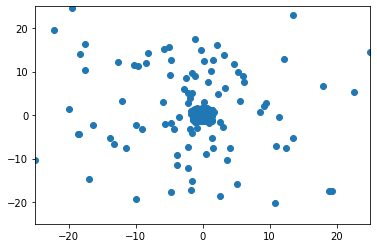

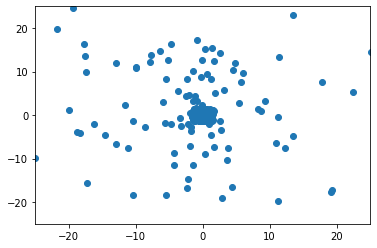

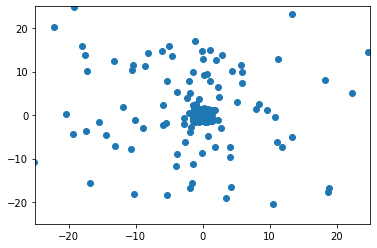

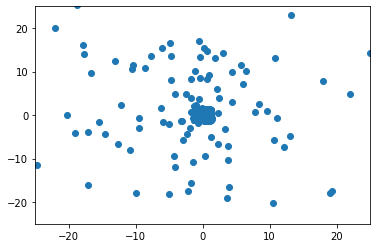

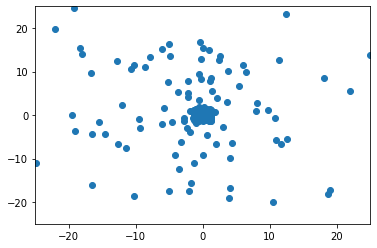

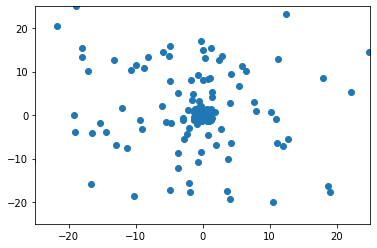

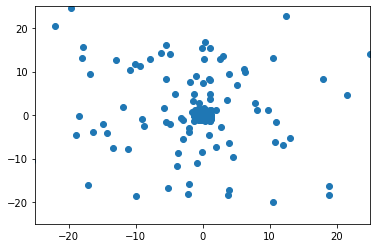

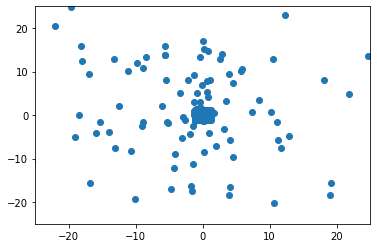

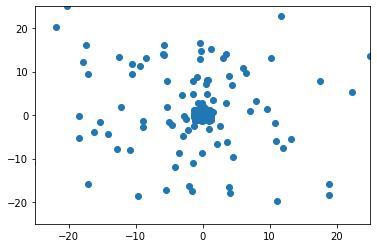

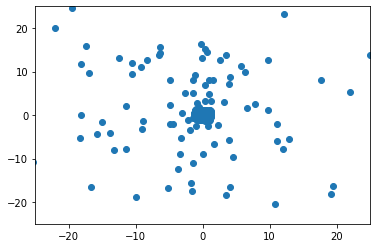

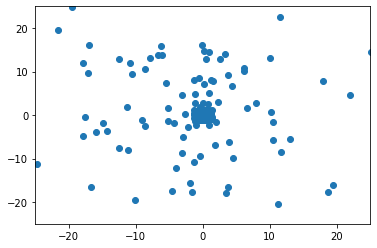

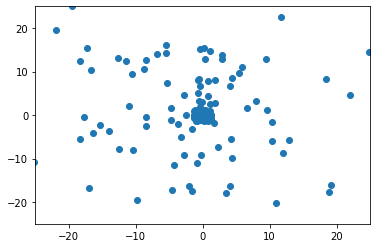

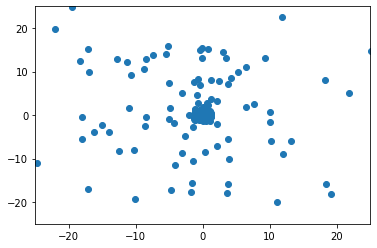

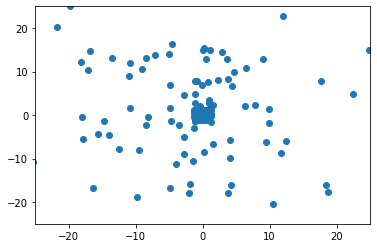

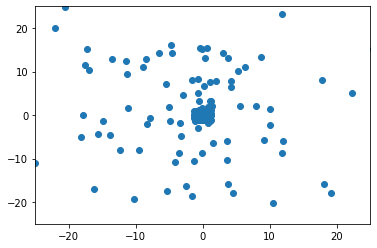

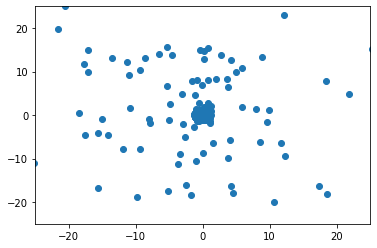

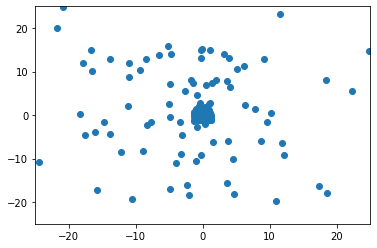

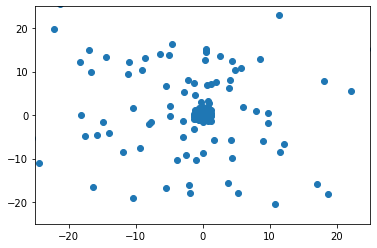

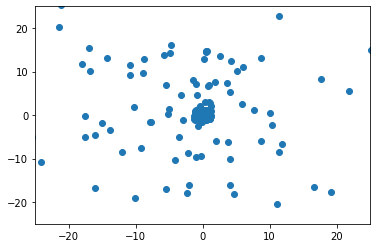

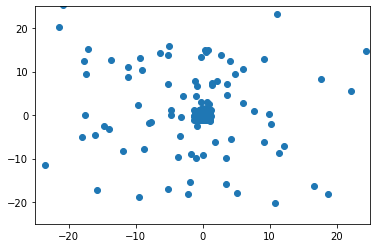

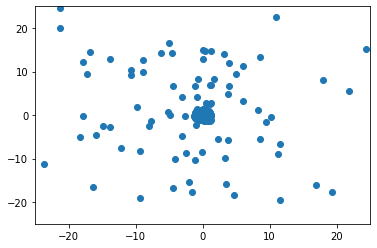

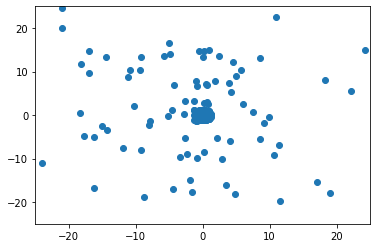

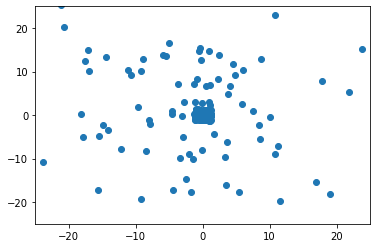

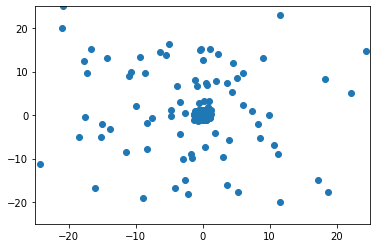

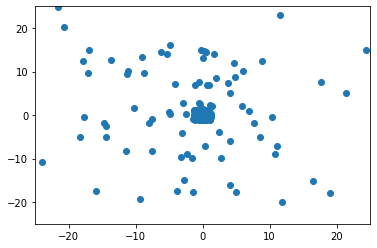

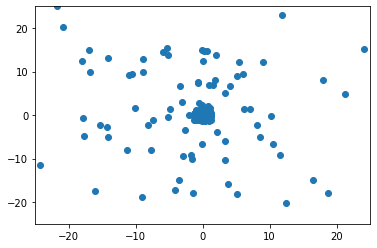

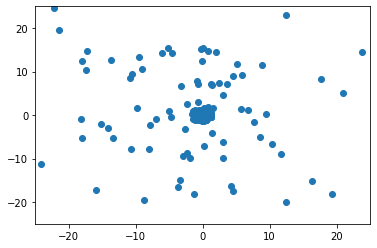

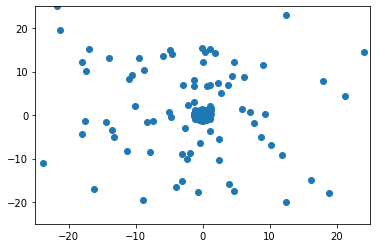

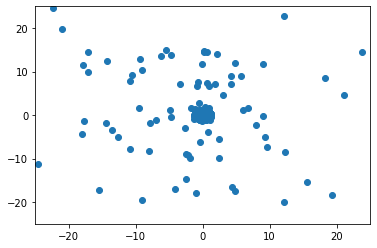

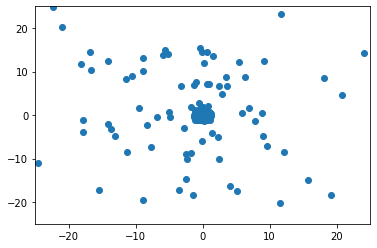

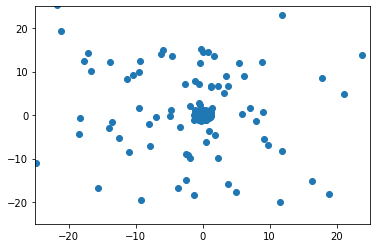

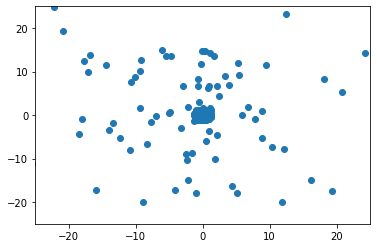

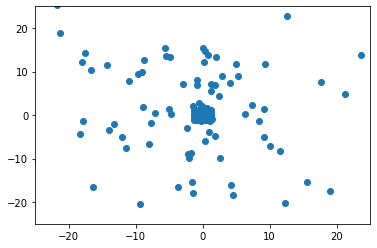

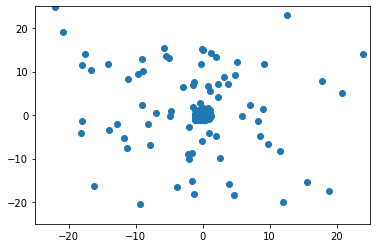

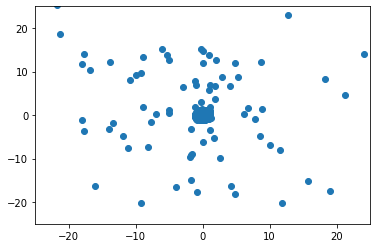

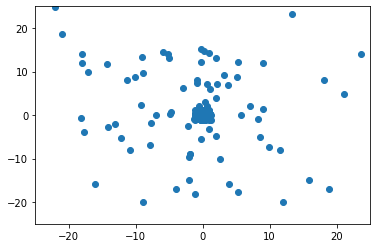

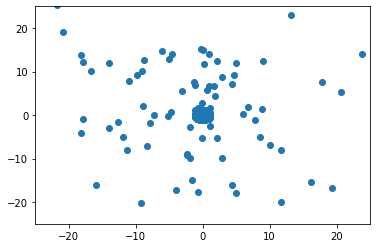

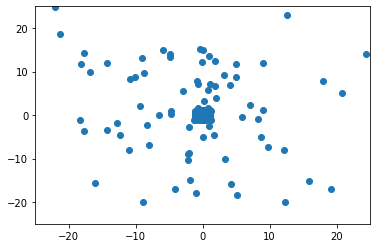

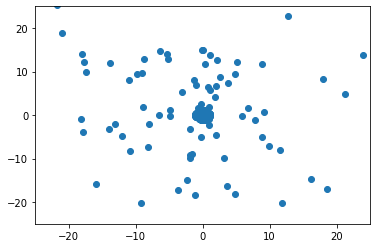

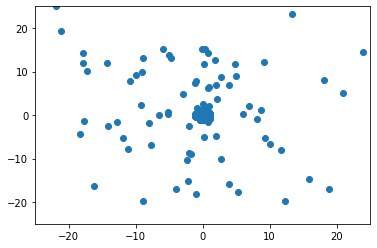

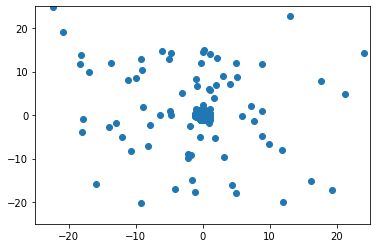

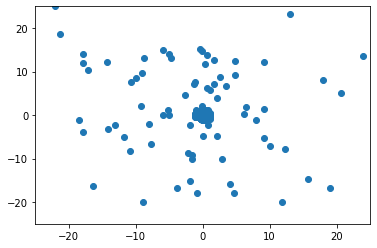

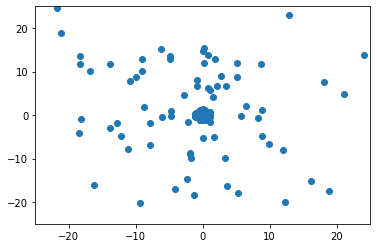

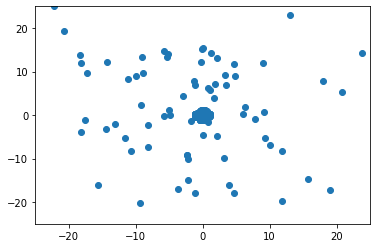

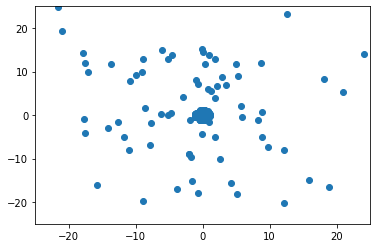

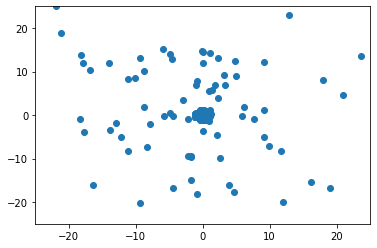

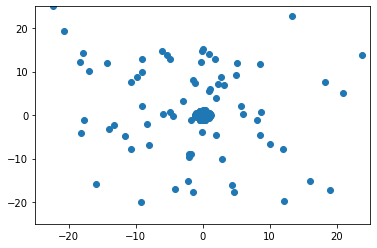

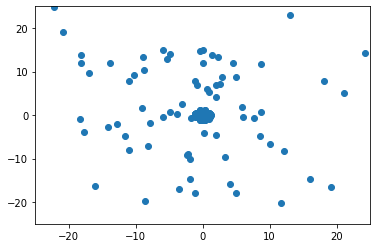

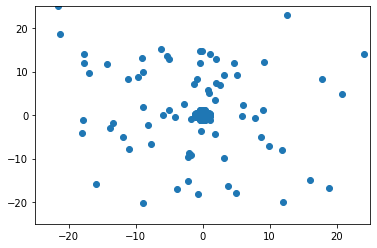

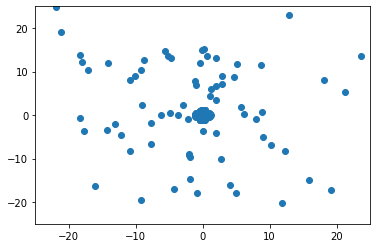

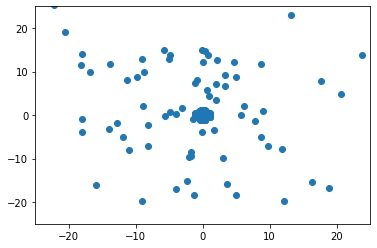

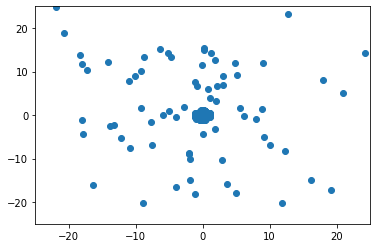

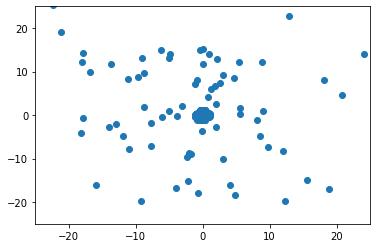

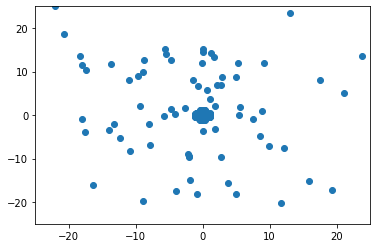

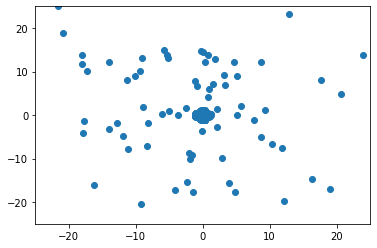

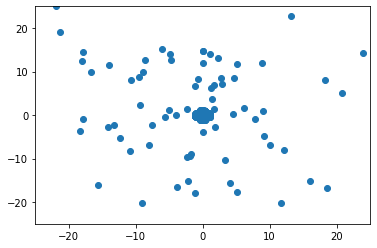

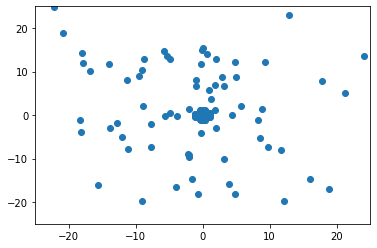

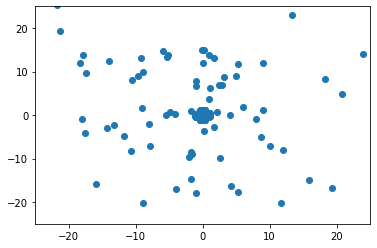

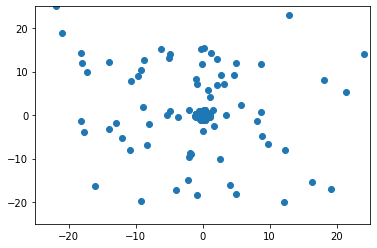

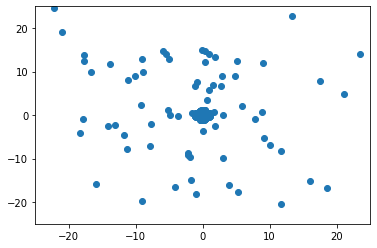

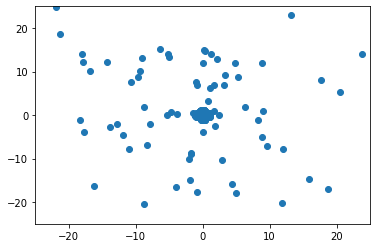

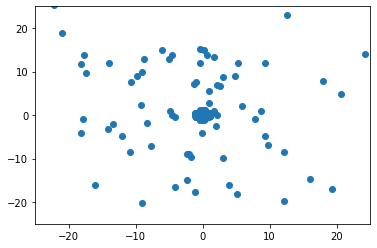

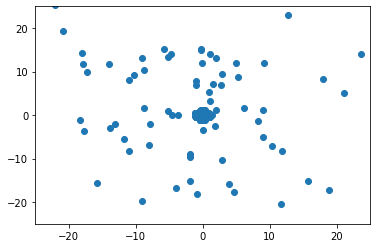

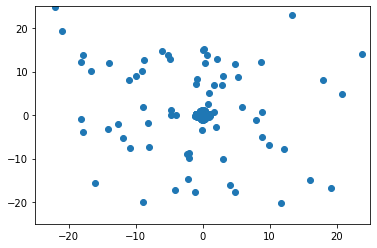

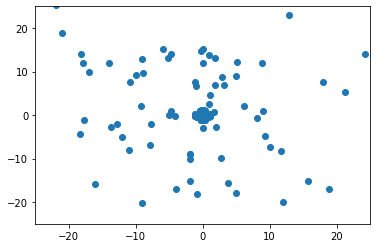

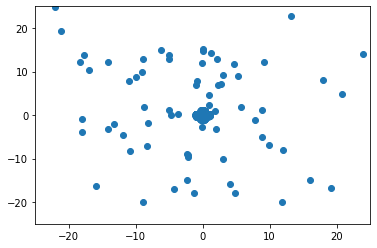

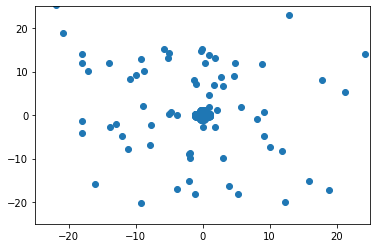

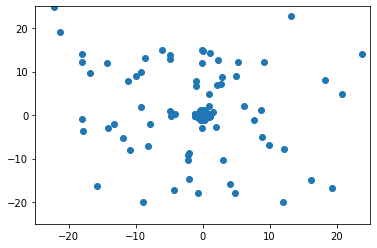

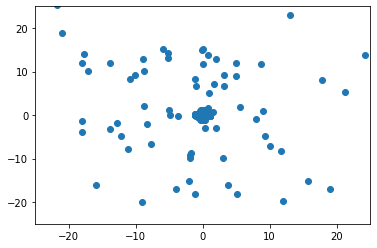

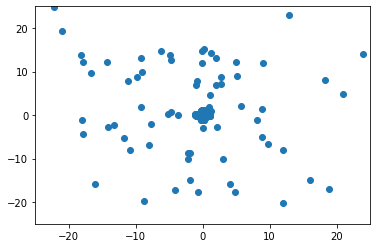

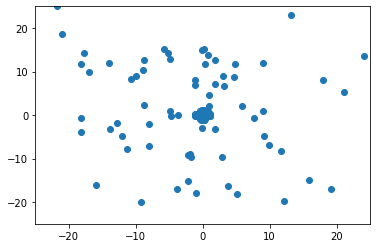

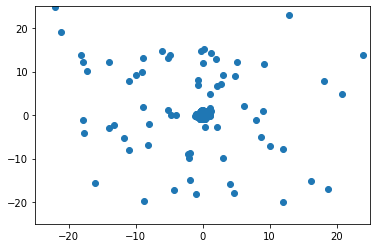

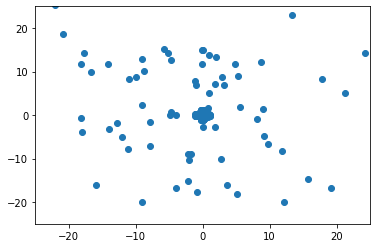

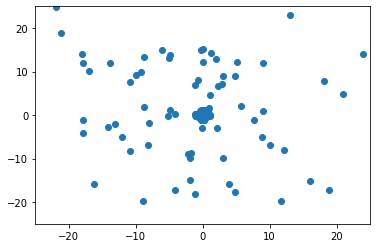

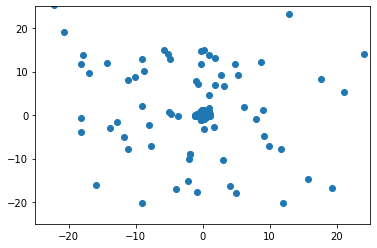

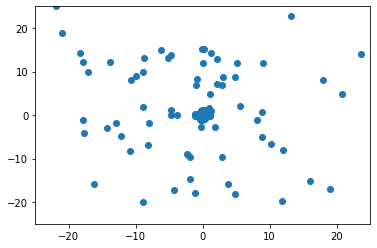

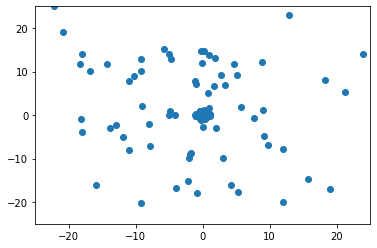

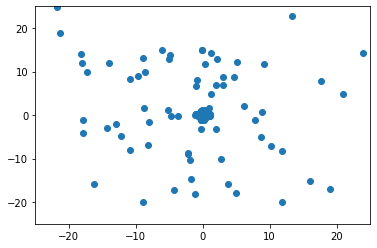

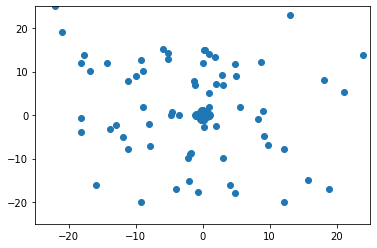

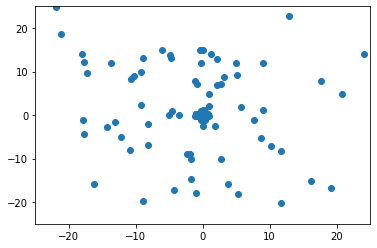

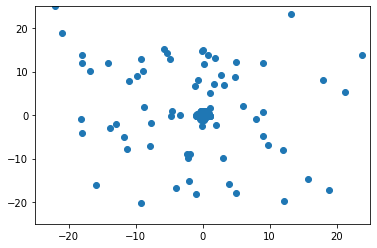

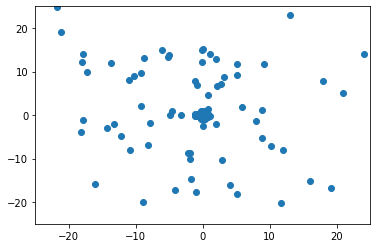

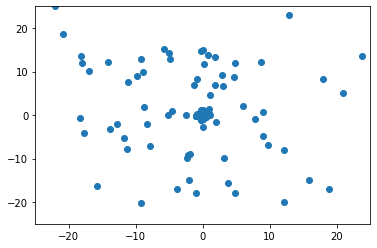

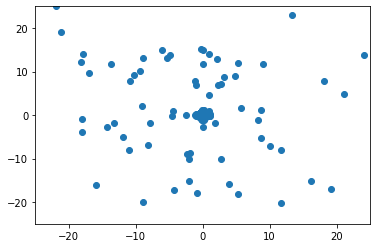

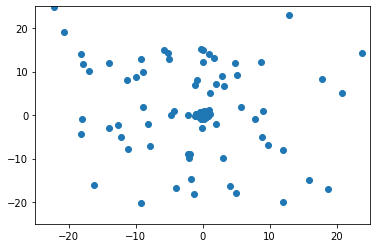

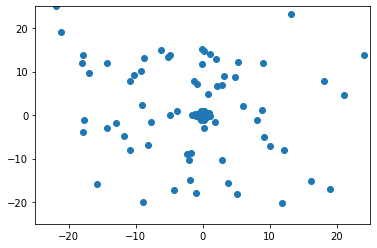

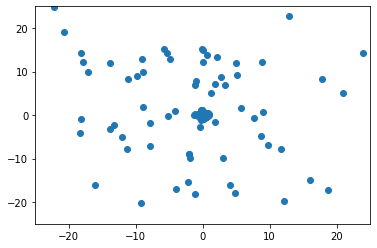

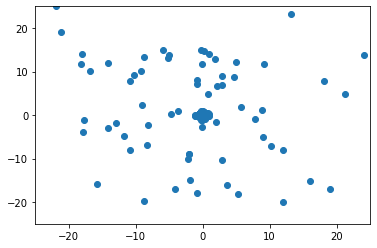

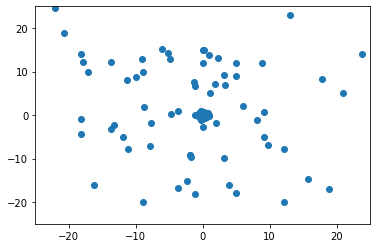

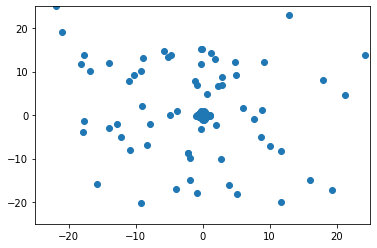

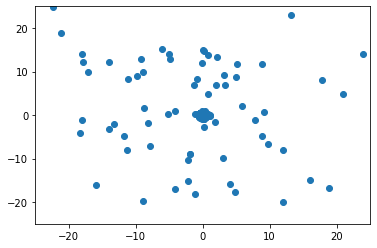

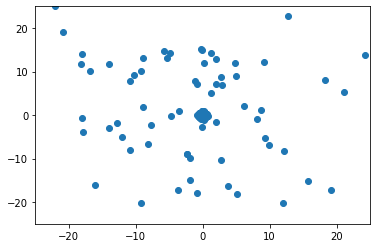

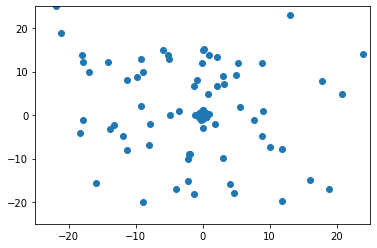

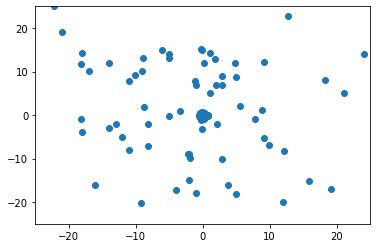

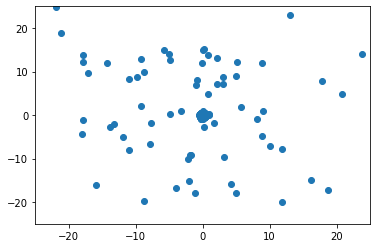

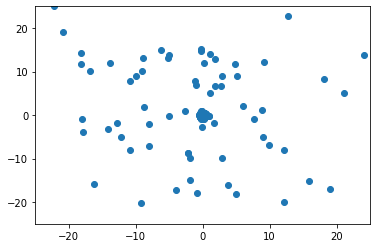

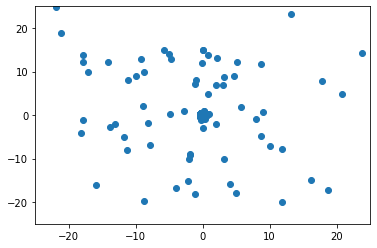

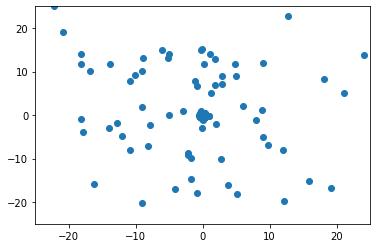

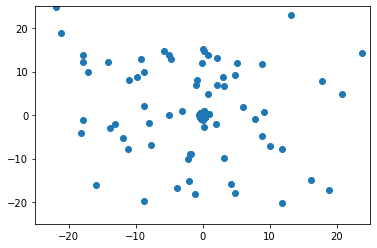

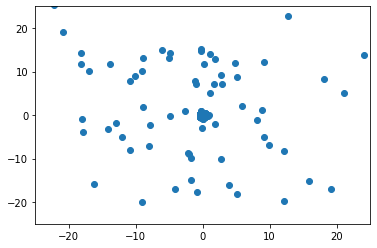

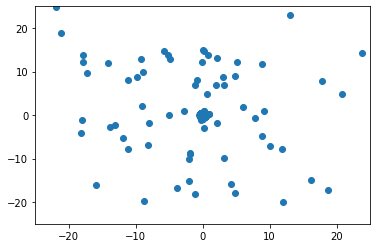

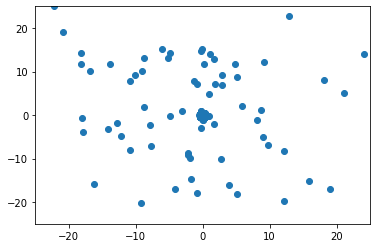

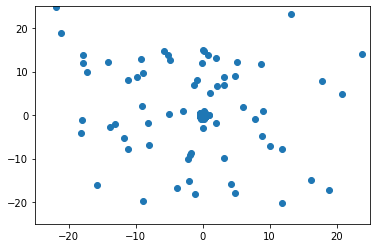

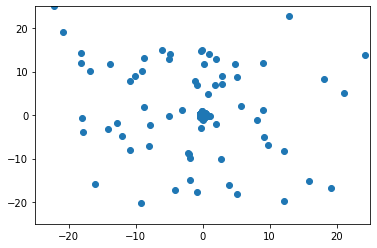

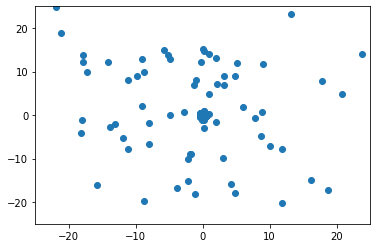

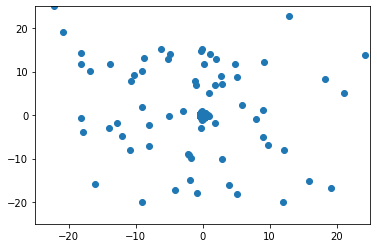

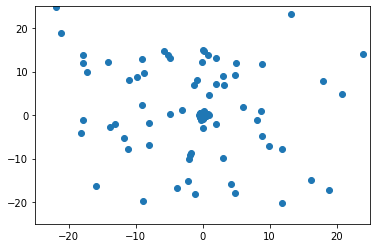

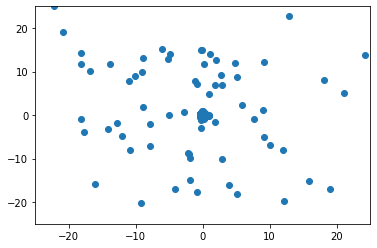

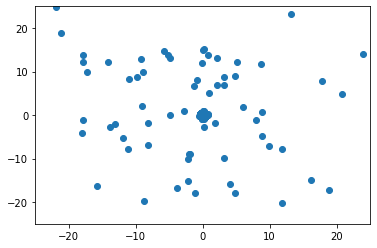

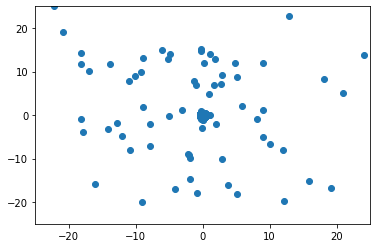

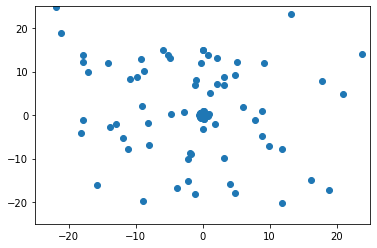

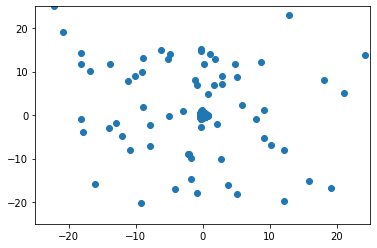

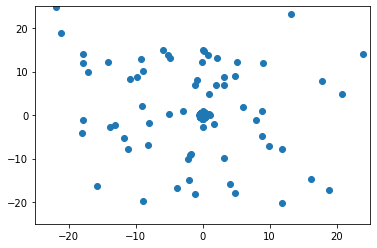

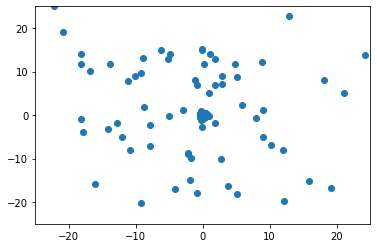

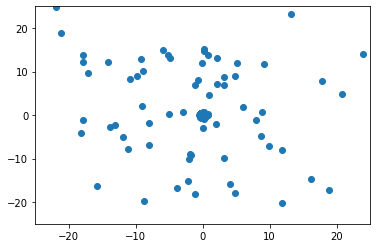

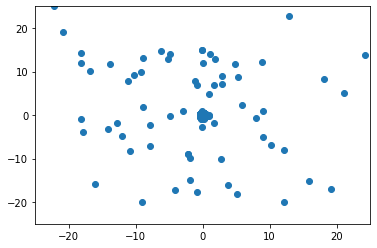

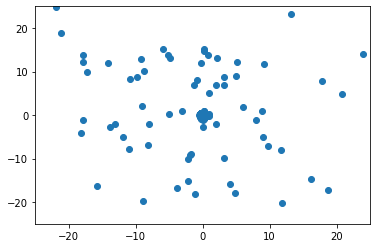

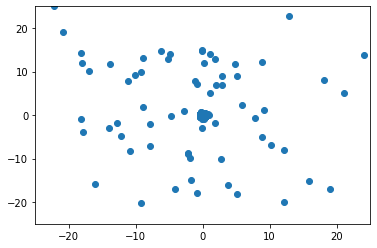

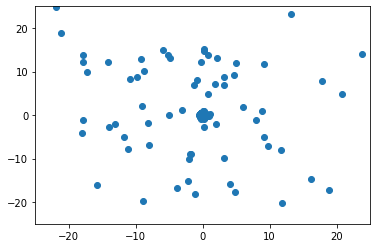

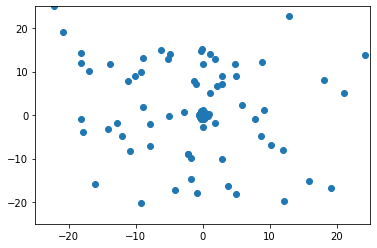

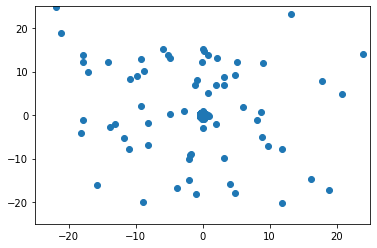

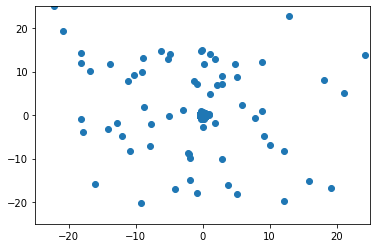

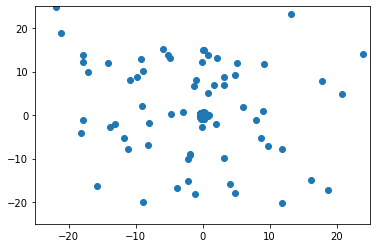

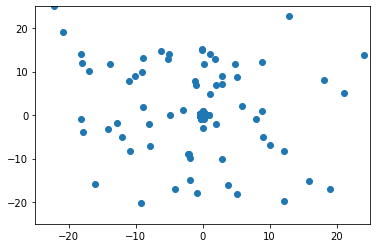

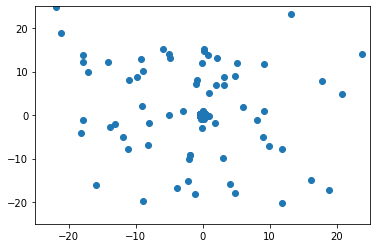

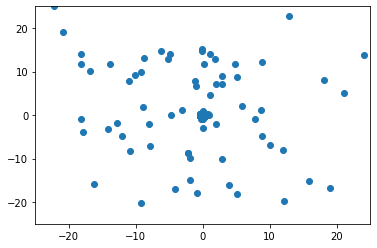

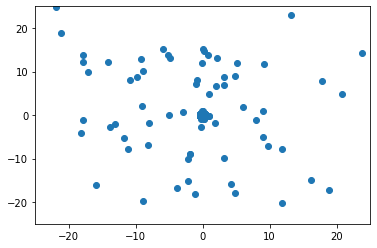

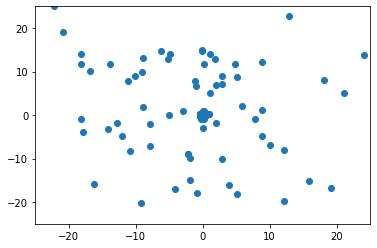

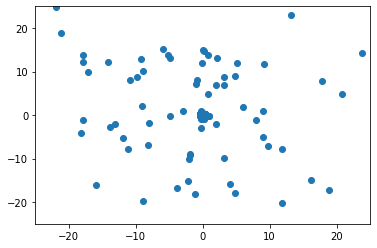

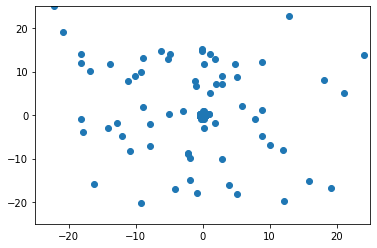

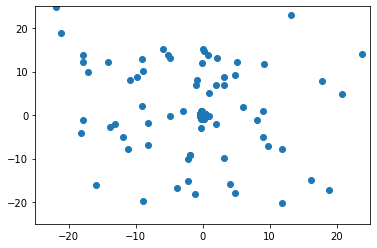

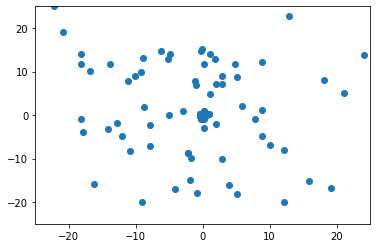

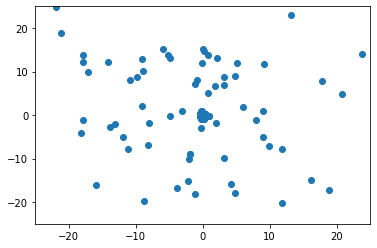

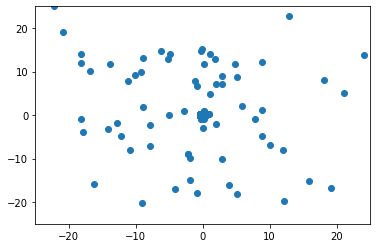

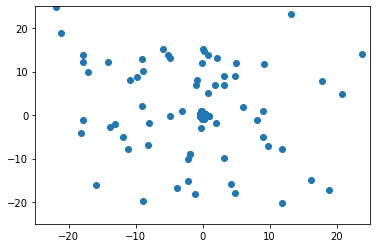

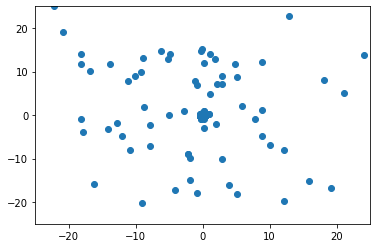

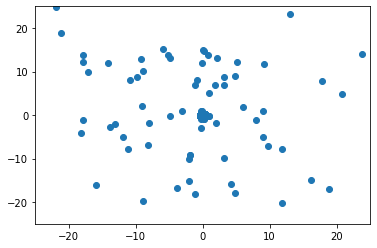

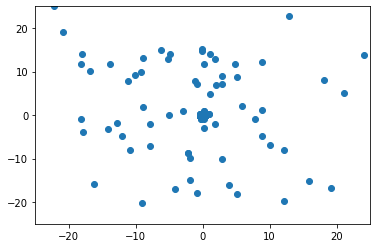

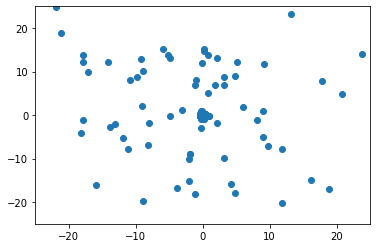

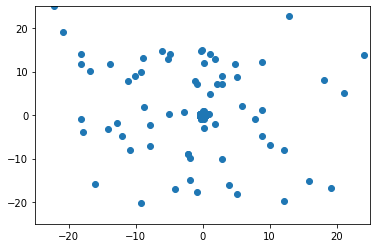

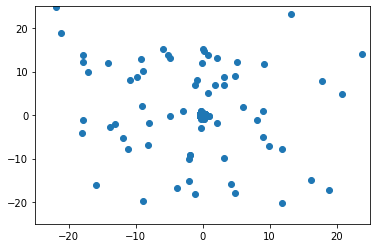

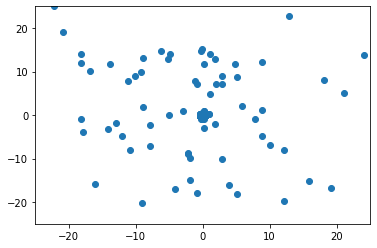

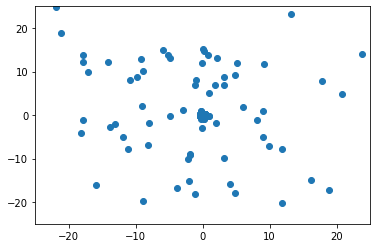

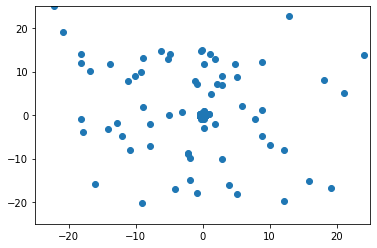

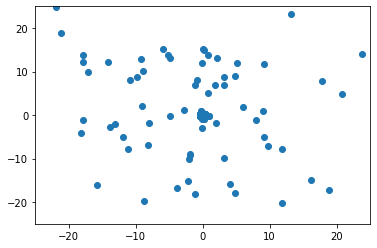

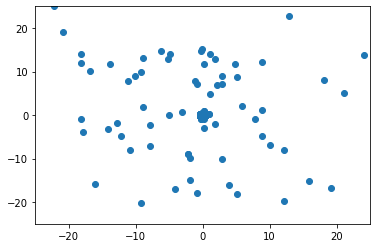

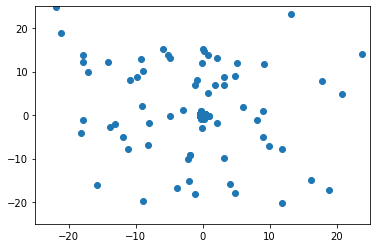

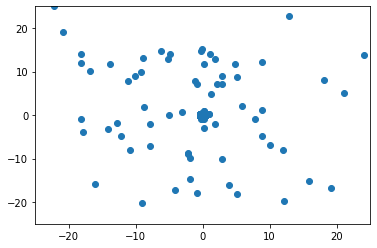

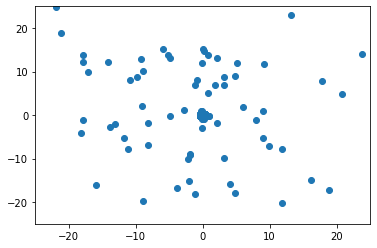

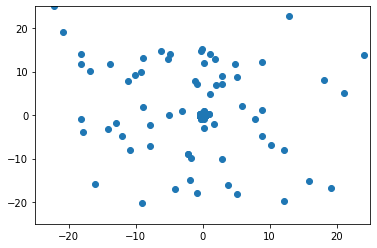

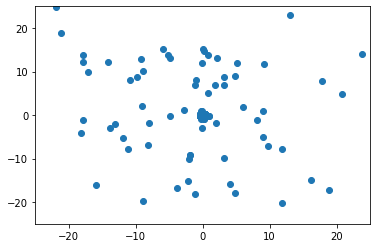

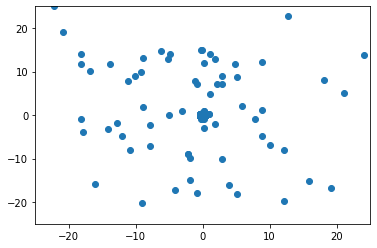

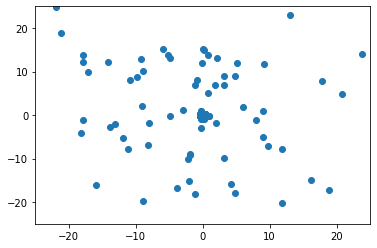

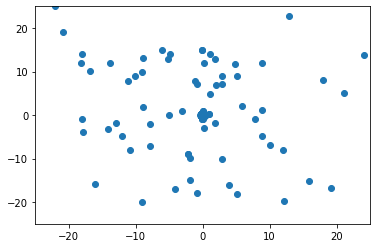

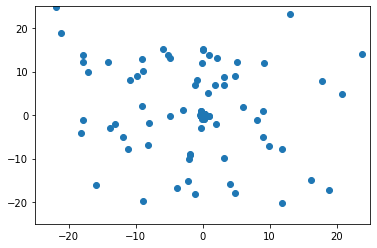

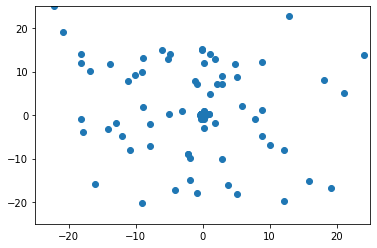

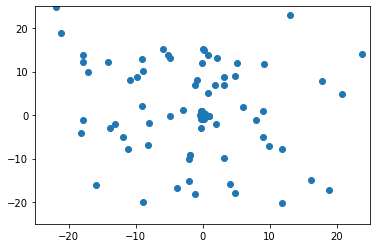

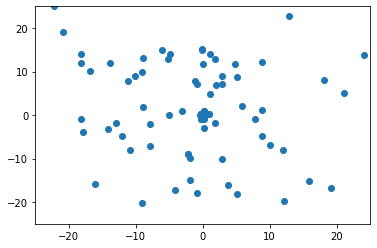

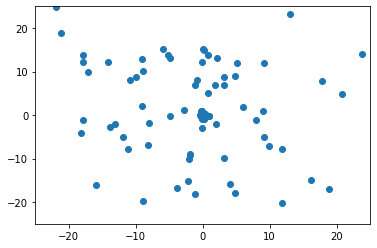

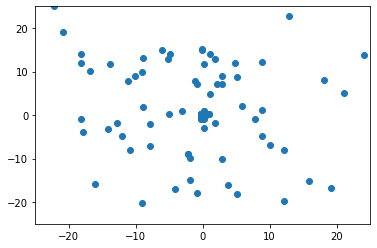

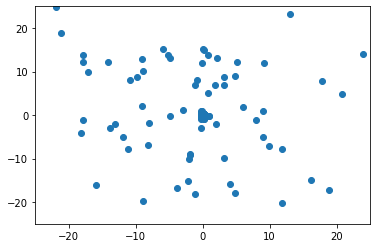

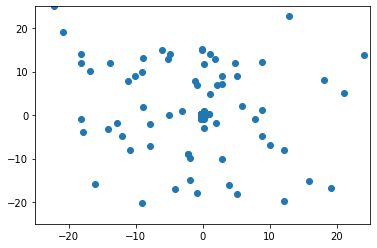

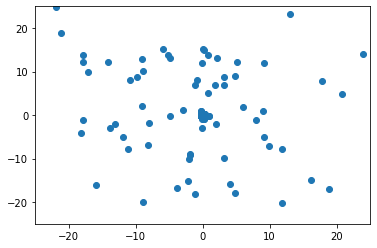

In [83]:
ani_path = create_animation_density_pictures(np.array(paths))

In [84]:
create_animation(ani_path, "test.mp4", framerate=22)